In [15]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Combining data into a file
files = ['Africa_TripCom.csv', 'France_TripCom.csv','Indonesia_TripCom.csv',
         'Japan_TripCom.csv', 'Korea_TripCom.csv', 'Malaysia_TripCom.csv', 'NewZealand_TripCom.csv', 'Portugal_TripCom.csv',
        'SouthAmerica_TripCom.csv']

scrapdata = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
scrapdata.to_csv('ScrapData.csv')
scrapdata.head(3)

,web-scraper-order,web-scraper-start-url,links,links-href,Pages,Pages-href,Country,Place,Details
0,1702401476-1,https://my.trip.com/travel-guide/attraction/af...,50. Signal Hill7.44.5/564 Reviewsbased on 3.9...,https://my.trip.com/travel-guide/attraction/ca...,5.0,https://my.trip.com/travel-guide/attraction/af...,Africa,Signal Hill,Signal Hill is located on the side of Table Mo...
1,1702401486-2,https://my.trip.com/travel-guide/attraction/af...,49. Alexandria Library7.44.5/5128 Reviewsbase...,https://my.trip.com/travel-guide/attraction/al...,5.0,https://my.trip.com/travel-guide/attraction/af...,Africa,Alexandria Library,This futuristic disc-shaped building is a worl...
2,1702401495-3,https://my.trip.com/travel-guide/attraction/af...,48. Pompey's Pillar7.44.3/5116 Reviewsbased o...,https://my.trip.com/travel-guide/attraction/al...,5.0,https://my.trip.com/travel-guide/attraction/af...,Africa,Pompey's Pillar,The Pompeii Column towers over the ruins of th...


In [17]:
# Combining data into a file
files = ['ScrapData.csv', 'ScienceRelated.csv']

# Try different encodings until the error is resolved
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16']

combinedata = None
for encoding in encodings:
    try:
        combinedata = pd.concat([pd.read_csv(file, encoding=encoding) for file in files], ignore_index=True)
        break  # Break out of the loop if reading is successful
    except UnicodeDecodeError:
        continue  # Try the next encoding if decoding fails

if combinedata is not None:
    combinedata.head(3)
else:
    print("Unable to read the CSV files with the specified encodings.")


In [18]:
column_to_read = ['Country','Place', 'Details', 'Class']
selected = combinedata[column_to_read].copy()
# Assuming 'Class' column has NaN values
selected['Class'] = selected['Class'].fillna('None Related')
# Display the selected DataFrame
selected.head(10)

,Country,Place,Details,Class
0,Africa,Signal Hill,Signal Hill is located on the side of Table Mo...,None Related
1,Africa,Alexandria Library,This futuristic disc-shaped building is a worl...,None Related
2,Africa,Pompey's Pillar,The Pompeii Column towers over the ruins of th...,None Related
3,Africa,Nairobi National Park,Nairobi National Park is 8 kilometers south of...,None Related
4,Africa,Giraffe Centre,The Giraffe Center is home to endangered Roths...,None Related
5,Africa,Mortuary Temple of Hatshepsut,This is the temple built by the famous Queen H...,None Related
6,Africa,Royal Palace Rabat Morocco,The Rabat Palace has a history of 227 years an...,None Related
7,Africa,Mount Kilimanjaro,Mount Kilimanjaro is located at the junction o...,None Related
8,Africa,Lion & Safari Park,One of the must-see attractions in Johannesbur...,None Related
9,Africa,Baie du Tamarin,"If you come to Mauritius, you must choose to g...",None Related


In [19]:
# Display the distribution of values in the 'Class' column
class_distribution = selected['Class'].value_counts()

# Display the total number of rows in the DataFrame
total_rows = len(selected)

# Calculate and print the percentage of each class
print("Class Distribution:")
print(class_distribution)
print("\nTotal Data Rows:", total_rows)

Class Distribution:
Class
None Related     497
Biotechnology    113
Robotic           98
Aerospace         42
Name: count, dtype: int64

Total Data Rows: 750


In [20]:
# Calculate and print the percentage of each class rounded to 2 decimal places
class_percentage = selected['Class'].value_counts(normalize=True) * 100
class_percentage_rounded = class_percentage.round(2)
print("\nClass Percentage:")
print(class_percentage_rounded)


Class Percentage:
Class
None Related     66.27
Biotechnology    15.07
Robotic          13.07
Aerospace         5.60
Name: proportion, dtype: float64


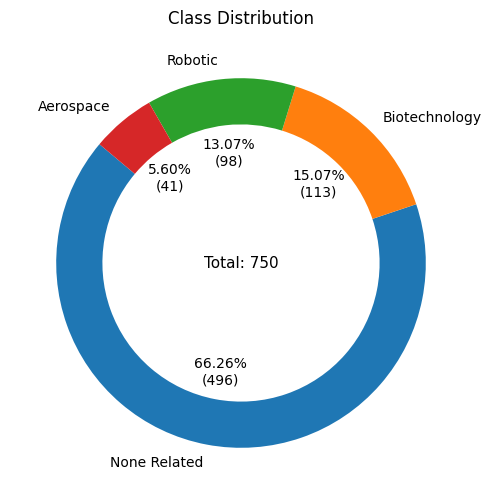

In [21]:
# Calculate and print the percentage of each class rounded to 2 decimal places
class_counts = selected['Class'].value_counts()
class_percentage = class_counts / class_counts.sum() * 100
class_percentage_rounded = class_percentage.round(2)

# Create a custom autopct function
def my_autopct(pct):
    total = sum(class_counts)
    count = int(pct * total / 100)
    return f'{pct:.2f}%\n({count})'

# Donut Plot
plt.figure(figsize=(10, 6))
plt.pie(class_percentage_rounded, labels=class_percentage_rounded.index, autopct=my_autopct, startangle=140, wedgeprops=dict(width=0.25))
plt.title('Class Distribution')

# Add total count of data
total_count = len(selected)
plt.text(0, 0, f'Total: {total_count}', horizontalalignment='center', verticalalignment='center', fontsize=11)

plt.savefig('class_distribution.png')
plt.show()


In [22]:
# Add a new column 'Word_Count' to store the word count for each row
selected['WordCountBeforeCleaning']  = selected['Details'].apply(lambda x: len(str(x).split()))

selected.to_csv('Dataset.csv', index=False)

# Calculate max, min, and average word counts
max_word_count = selected['WordCountBeforeCleaning'].max()
min_word_count = selected['WordCountBeforeCleaning'].min()
avg_word_count = selected['WordCountBeforeCleaning'].mean()

print(f"Maximum Word Count: {max_word_count}")
print(f"Minimum Word Count: {min_word_count}")
print(f"Average Word Count: {avg_word_count:.0f}")

# Display the updated DataFrame
selected.head()

Maximum Word Count: 794
Minimum Word Count: 11
Average Word Count: 132


,Country,Place,Details,Class,WordCountBeforeCleaning
0,Africa,Signal Hill,Signal Hill is located on the side of Table Mo...,None Related,168
1,Africa,Alexandria Library,This futuristic disc-shaped building is a worl...,None Related,147
2,Africa,Pompey's Pillar,The Pompeii Column towers over the ruins of th...,None Related,193
3,Africa,Nairobi National Park,Nairobi National Park is 8 kilometers south of...,None Related,53
4,Africa,Giraffe Centre,The Giraffe Center is home to endangered Roths...,None Related,193


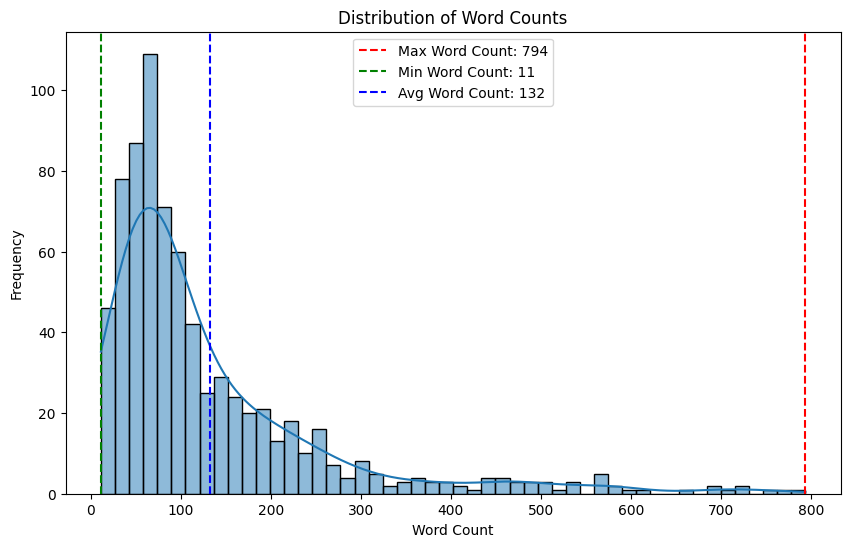

In [23]:
# Create a histogram of word counts
plt.figure(figsize=(10, 6))
sns.histplot(selected['WordCountBeforeCleaning'], bins=50, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.axvline(x=max_word_count, color='red', linestyle='--', label=f'Max Word Count: {max_word_count}')
plt.axvline(x=min_word_count, color='green', linestyle='--', label=f'Min Word Count: {min_word_count}')
plt.axvline(x=avg_word_count, color='blue', linestyle='--', label=f'Avg Word Count: {avg_word_count:.0f}')
plt.legend()
plt.savefig('raw_word_count_distribution.png')
plt.show()


In [24]:
# Find the row with the maximum word count
row_with_max_word_count = selected.loc[selected['WordCountBeforeCleaning'].idxmax()]

# Display the row with the maximum word count
print("Row with Maximum Word Count:")
row_with_max_word_count.head()


Row with Maximum Word Count:


Country                                                               France
Place                                                     Montparnasse Tower
Details                    With a height of 210 meters, the Montparnasse ...
Class                                                           None Related
WordCountBeforeCleaning                                                  794
Name: 59, dtype: object

In [25]:
# Find the row with the minimum word count
row_with_min_word_count = selected.loc[selected['WordCountBeforeCleaning'].idxmin()]

# Display the row with the minimum word count
print("Row with Minimum Word Count:")
print(row_with_min_word_count)


Row with Minimum Word Count:
Country                                                               Poland
Place                                                           Celon Pharma
Details                    Integrated pharmaceutical company which conduc...
Class                                                          Biotechnology
WordCountBeforeCleaning                                                   11
Name: 513, dtype: object


Testing for similarity

In [26]:
###This one is working but only for 1 row

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Read the data from 'data1.2.csv'
data = pd.read_csv('Dataset.csv')

# Extract the first row of the DataFrame
first_row_data = data.iloc[[700]]

# Preprocess the 'Details' column
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text  # Add this line to return the modified text


# Apply preprocessing to 'Details' column
first_row_data.loc[:, 'Details'] = first_row_data['Details'].apply(preprocess_text)

# Create a TfidfVectorizer instance with binary=True to represent presence/absence of words
vectorizer = TfidfVectorizer(binary=True)


# Fit and transform 'Details' to get the TF-IDF matrix
tfidf_matrix_details = vectorizer.fit_transform(first_row_data['Details'])

# Get unique class labels from the filtered row
unique_class_labels = first_row_data['Class'].unique()

# Access the vocabulary (words) from the TfidfVectorizer
words_in_details = vectorizer.get_feature_names_out()

# Initialize an empty DataFrame with unique class labels as index
cosine_sim_df = pd.DataFrame(index=unique_class_labels, columns=words_in_details)

# Calculate cosine similarity for each class
for class_label in unique_class_labels:
    # Print the current class label
    # print(f'Processing class: {class_label}')

    # Transform 'Class' to get the TF-IDF matrix for the specific class
    tfidf_matrix_class = vectorizer.transform([class_label.lower()])

    # Calculate cosine similarity between 'Details' and the specific class for each word
    cosine_sim_wordwise = cosine_similarity(tfidf_matrix_details, tfidf_matrix_class)

    # Flatten the matrix and assign values to the DataFrame
    cosine_sim_df.loc[class_label] = cosine_sim_wordwise.flatten()

# Specify the class labels
class_labels = data['Class'].unique()

# Create a dictionary to store the top similar words for the current class
top_similar_words = {}

for class_label in class_labels:
    # Check if the current class label is the same as the one in the row
    if class_label == first_row_data['Class'].values[0]:
        # Get the cosine similarity values for the current class
        class_similarity_values = cosine_sim_df.loc[class_label]

        # Exclude the class label itself from the list
        top_words = class_similarity_values.drop(class_label, errors='ignore').sort_values(ascending=False).head(10).index.tolist()

        # Store the top words in the dictionary
        top_similar_words[class_label] = top_words

# Display the top similar words for the current class
for class_label, words in top_similar_words.items():
    print(f'Top 10 words similar to {class_label} in "Details" column: {words}')

Top 10 words similar to Aerospace in "Details" column: ['2021', 'nuclear', 'projects', 'program', 'production', 'partners', 'orbiting', 'one', 'observatory', 'northrops']


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import nltk
import string
import re
import spacy

# nltk.download('wordnet')

# Read the CSV file
data = pd.read_csv('Dataset.csv')

# Preprocess the 'Details' column
stop_words = set(nltk.corpus.stopwords.words('english'))

# Add custom stop words
custom_stop_words = {'also', 'located', 'many', 'one', 'see', 'built', 'african', 'africa', 'people'}
stop_words.update(custom_stop_words)

# Load SpaCy NLP model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # Convert to lowercase, remove punctuation, and remove stopwords
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Use SpaCy to identify named entities and remove specific types
    doc = nlp(text)
    text = ' '.join([token.text for token in doc if token.ent_type_ not in ['PERSON','DATE','MONEY','TIME','PERCENT','PRODUCT','LANGUAGE','NORP','ORDINAL']])
    return text

lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

data.loc[:, 'Details'] = data['Details'].apply(preprocess_text)
data.loc[:, 'Details'] = data['Details'].apply(lemmatize_text)

vectorizer = TfidfVectorizer(binary=True)

# Create a list to store top similar words for each row
top_similar_words_list = []

# Get unique class labels for the entire DataFrame
unique_class_labels = data['Class'].unique()

for index, row in data.iterrows():
    # Fit and transform 'Details' for the current row
    tfidf_matrix_details = vectorizer.fit_transform([row['Details']])
    
    # Calculate cosine similarity for each class
    cosine_sim_df = pd.DataFrame(index=unique_class_labels, columns=vectorizer.get_feature_names_out())
    for class_label in unique_class_labels:
        tfidf_matrix_class = vectorizer.transform([class_label.lower()])
        cosine_sim_wordwise = cosine_similarity(tfidf_matrix_details, tfidf_matrix_class)
        cosine_sim_df.loc[class_label] = cosine_sim_wordwise.flatten()

    # Find top similar words for the current row and class
    current_class_label = row['Class']

    # Sort words based on cosine similarity in descending order
    top_words = cosine_sim_df.loc[current_class_label].drop(current_class_label, errors='ignore').sort_values(ascending=False).index.tolist()

    # Select top 5 words
    top_words = top_words[:10]

    # Create a new column for similar words and join using a comma
    data.loc[index, 'Similar_Words'] = ', '.join(top_words)

    # Store the top words for the current row
    top_similar_words_list.append({
        'Class': current_class_label,
        'Top_Similar_Words': top_words
    })

# Display the modified DataFrame
print(data[['Details', 'Class', 'Similar_Words']])

data.to_csv('withsimilarwords.csv', index=False)

                                               Details          Class  \
0    signal hill side table mountain named firing c...   None Related   
1    futuristic discshaped building worldrenowned r...   None Related   
2    pompeii column tower ruin temple serapeum requ...   None Related   
3    nairobi national park kilometer south nairobi ...   None Related   
4    giraffe center home endangered mission foster ...   None Related   
..                                                 ...            ...   
745  precision medicine company patented ai deep se...  Biotechnology   
746  sophia genetics datadriven medicine software c...  Biotechnology   
747  spintellx computational system pathology compa...  Biotechnology   
748  technology company building world largest libr...  Biotechnology   
749  us immunogenomics bioinformatics artificial in...  Biotechnology   

                                         Similar_Words  
0    african, silver, mountain, multiple, named, oc...  
1    anti